# Synthetic Resampling

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Generate an imbalanced data set

In [2]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)

# Convert ndarray to pandas datatypes
X = pd.DataFrame(X)
y = pd.Series(y)

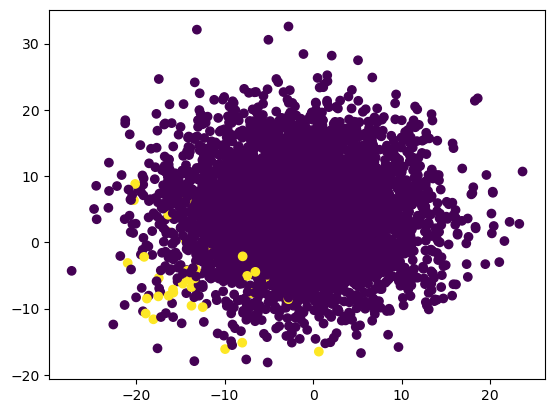

In [3]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y)
plt.show()

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Count distinct values
y_train.value_counts()

0    3753
1      34
dtype: int64

---

## Cluster Centroids

In [6]:
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids

# Create an instance of ClusterCentroids
cc = ClusterCentroids(random_state=1)

# Fit the cluster centroids model to the traning data
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [7]:
# Count resampled values
y_resampled.value_counts()

0    34
1    34
dtype: int64

In [8]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [9]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [10]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.33      0.06      0.11        16

    accuracy                           0.99      1263
   macro avg       0.66      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1247
           1       0.07      0.81      0.12        16

    accuracy                           0.85      1263
   macro avg       0.53      0.83      0.52      1263
weighted avg       0.99      0.85      0.91      1263



---

## SMOTE

In [11]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE model instance
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

# Fit the SMOTE model to the training data
X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

In [12]:
# Count resampled values
y_resampled.value_counts()

0    3753
1    3753
dtype: int64

In [13]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit random forest on resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [14]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [15]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1247
           1       0.06      0.44      0.10        16

    accuracy                           0.90      1263
   macro avg       0.53      0.67      0.53      1263
weighted avg       0.98      0.90      0.94      1263



---

## SMOTEENN

In [16]:
# Import SMOTEENN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate an instance of the SMOTEENN model
smote_enn = SMOTEENN(random_state=1)

# Fit the SMOTEENN model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [17]:
# Count distinct values
y_resampled.value_counts()

1    3167
0    3103
dtype: int64

In [18]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [19]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [20]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.99      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1247
           1       0.08      0.69      0.15        16

    accuracy                           0.90      1263
   macro avg       0.54      0.79      0.55      1263
weighted avg       0.98      0.90      0.94      1263

